<a href="https://colab.research.google.com/github/anakindinger/img_proc/blob/main/nb_filtros_media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#===============================================================================
# Atividade: Implementação filtro da média
#-------------------------------------------------------------------------------
# Enunciado:
'''Objetivo: implemente 3 algoritmos para o filtro da média:
- Algoritmo “ingênuo”.
- Filtro separável (escolha se quer fazer com ou sem aproveitar as somas anteriores).
- Algoritmo com imagens integrais.


Notas:
- Coloque as 3 implementações no mesmo arquivo, junto com um programa principal que permita testá-las.
- Para imagens coloridas, processar cada canal RGB independentemente.
- Tratamento das margens: na implementação com imagens integrais, fazer média considerando somente os pixels válidos; nas outras pode simplesmente ignorar posições cujas janelas ficariam fora da imagem.
- O pacote tem algumas imagens para comparação. Se estiver usando OpenCV, compare os resultados com os da função blur da biblioteca (exceto pelas margens, o resultado deve ser igual!).
'''




In [4]:
INPUT_IMAGE =  'camaleao.png'

# CONSTANTES

JAN_LARGURA = 9
JAN_ALTURA = 9

#===============================================================================

In [5]:
def media_ingenua(img, largura, altura):
    '''Implementação do filtro da média com a abordagem ingênua usando for com kwargs para altura e largura.
    Parâmetros:
    img: Imagem de entrada.
    largura: Largura da janela 
    altura: Altura da janela 

    Valor de retorno: Imagem filtrada.
    '''

    if largura <= 0 or altura <= 0:
        raise ValueError("Largura e altura devem ser maiores que 0.")


    img_ingenua = np.zeros_like(img, dtype = np.float32)
    meia_largura = largura // 2 if largura > 1 else 1  # Use meia_largura apenas se largura > 1
    meia_altura = altura // 2 if altura > 1 else 1   # Use meia_altura apenas se altura > 1

    for linha in range(meia_altura, img.shape[0] - meia_altura):
        for coluna in range(meia_largura, img.shape[1] - meia_largura):
            soma = 0
            for linha_jan in range(linha - meia_altura, linha + meia_altura + 1):
                for coluna_jan in range(coluna - meia_largura, coluna + meia_largura + 1):
                    soma += img[linha_jan, coluna_jan]

            img_ingenua[linha, coluna] = soma / (largura * altura)

    return img_ingenua

In [ ]:

def media_separavel (img, largura, altura):
    '''Implementação do filtro da média separável. esta implementação não aproveita as somas anteriores, não considera as margens e aproveita a função de média ingênua implementada anteriormente.
    Parâmetros:
    img: Imagem de entrada.
    largura: Largura da janela
    altura: Altura da janela
    retorno: Imagem filtrada.
    '''
    img_separavel = np.zeros_like(img, dtype=np.float32) #iniciando uma imagem 'vazia'
    buffer = np.zeros((img.shape[0], img.shape[1]), dtype=np.float32) #iniciando um buffer 'vazio'
    
    #filtragem na horizontal
    buffer = media_ingenua(img, largura, 1) #aplicando a função de média ingênua na horizontal
    #filtragem na vertical
    img_separavel = media_ingenua(buffer, 1, altura) #aplicando a função de média ingênua na vertical

    return img_separavel

In [7]:
def media_integral(img, largura, altura):
    '''Implementação do filtro da média usando imagens integrais.
    Parâmetros:
    img: Imagem de entrada.
    largura: Largura da janela.
    altura: Altura da janela.
    Valor de retorno: Imagem filtrada.
    '''
    if largura <= 0 or altura <= 0:
        raise ValueError("Largura e altura devem ser maiores que 0.")

    img_integral = np.zeros_like(img, dtype=np.float32) #iniciando uma imagem 'vazia'
    integrais = np.zeros_like(img, dtype=np.float32)
    meia_largura = largura // 2 if largura > 1 else 1  # Use meia_largura apenas se largura > 1
    meia_altura = altura // 2 if altura > 1 else 1   # Use meia_altura apenas se altura > 1

    #calculando a matriz onde vou salvar as integrais
    for linha in range(img.shape[0]):
        for coluna in range(img.shape[1]):
            integrais[linha, coluna] = img[linha, coluna] + integrais[linha-1,coluna] + integrais[linha,coluna-1] - integrais[linha-1,coluna-1]

    #calculando as médias
    for linha in range(img.shape[0]):
        for coluna in range(img.shape[1]):
            # Verifica se a janela está dentro dos limites da imagem
            linha_inicial = max(0, linha - meia_altura)
            linha_final = min(img.shape[0], linha + meia_altura + 1)
            coluna_inicial = max(0, coluna - meia_largura)
            coluna_final = min(img.shape[1], coluna + meia_largura + 1)
            
            #  ↘ - ↙ - ↗ + ↖
            soma = integrais[linha_final, coluna_final] - integrais[linha_final, coluna_inicial] - integrais[linha_inicial, coluna_final] + integrais[linha_inicial, coluna_inicial]
            area = (linha_final - linha_inicial) * (coluna_final - coluna_inicial)#calcula a area da janela que sobrepoe a imagem
            
            # Verifica se a área é maior que 0 para evitar divisão por zero
            if area > 0:
                img_integral[linha, coluna] = soma / area
            else:
                img_integral[linha, coluna] = 0

    return img_integral


In [10]:


    # Abre a imagem em escala de cinza.
img = cv2.imread(INPUT_IMAGE, cv2.IMREAD_GRAYSCALE)
if img is None:
        print('Erro abrindo a imagem.\n')
        sys.exit()
#cv2_imshow(img)
cv2.imshow('Original', img)
    
    # É uma boa prática manter o shape com 3 valores, independente da imagem ser
    # colorida ou não. Também já convertemos para float32.
img = img.reshape((img.shape[0], img.shape[1], 1))
img = img.astype(np.float32) / 255
    
    # Mantém uma cópia colorida para desenhar a saída.
    # img_out = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    
#cv2.waitKey(0)




In [11]:
img_ingenua =  media_ingenua(img, JAN_LARGURA, JAN_ALTURA)
    #print(img_ingenua)
#cv2_imshow ( img_ingenua*255)
cv2.imshow('iNGENUO', img_ingenua)
#cv2.waitKey(0)


: 

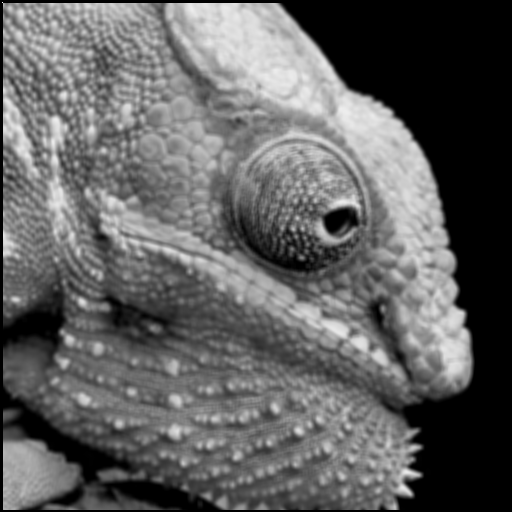

In [ ]:
img_integral =  media_integral (img, largura=TAM_JANELA, altura=TAM_JANELA)
    #print(img_integral)
cv2_imshow ( img_integral*255)
    #cv2.imwrite ('01 - ingenua.png', img_ingenua*255)